In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
shared_link = "https://docs.google.com/spreadsheets/d/1rM05vAK8DGr0BgAW0AvLGWgC8ryTE8Pm/edit?usp=sharing&ouid=113964186664904145794&rtpof=true&sd=true"


In [ ]:
url_for_pandas = shared_link.replace("/edit?usp=sharing", "/export?format=xlsx")


In [ ]:
df = pd.read_excel(url_for_pandas)
df.tail(10)


,date,Unnamed: 1,temperature
33,2024-03-05,temperature,25
34,2024-03-06,temperature,25
35,2024-03-07,temperature,22
36,2024-03-08,temperature,27
37,2024-03-09,temperature,29
38,2024-03-10,temperature,23
39,2024-03-11,temperature,26
40,2024-03-12,temperature,25
41,2024-03-13,temperature,25
42,2024-03-14,temperature,25


In [ ]:

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [ ]:
model = ARIMA(df['temperature'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Make predictions for the next 4 days
predictions = model_fit.forecast(steps=20)
print(predictions)


2024-03-15    25.169407
2024-03-16    25.164529
2024-03-17    25.164670
2024-03-18    25.164666
2024-03-19    25.164666
                ...    
2024-06-18    25.164666
2024-06-19    25.164666
2024-06-20    25.164666
2024-06-21    25.164666
2024-06-22    25.164666
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


In [ ]:
prediction_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1),periods=len(predictions), freq='D')

In [ ]:
predictions_df = pd.DataFrame({'predicted_temperature': predictions},index=prediction_dates)


In [ ]:
combined_data = pd.concat([df[['temperature']], predictions_df])


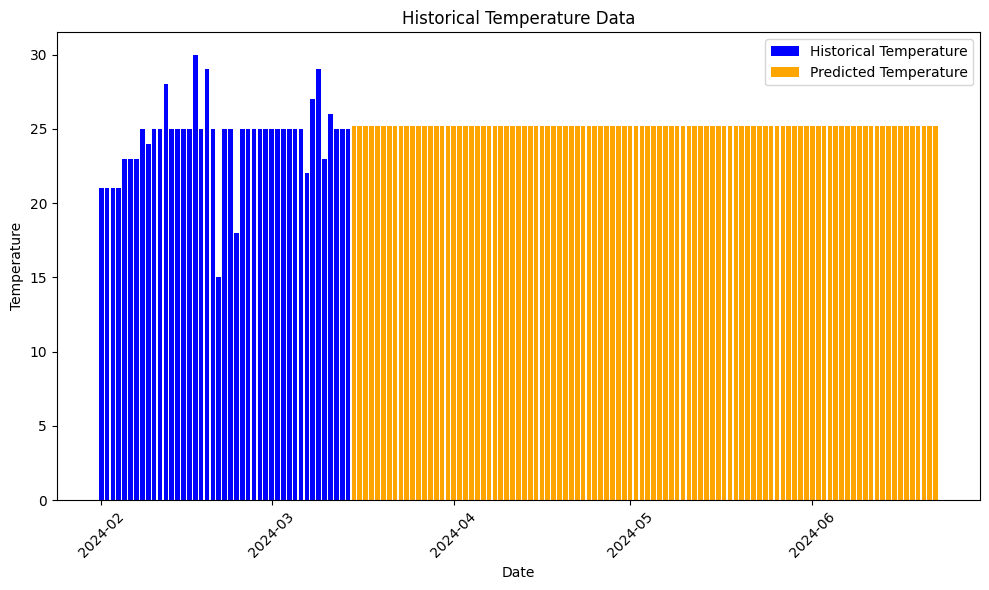

In [ ]:
plt.figure(figsize=(10, 6))

# Plot historical temperatures
plt.bar(df.index, df['temperature'], label='Historical Temperature',
color='blue')
plt.bar(prediction_dates, predictions, label='Predicted Temperature',
color='orange')
plt.legend()
plt.title('Historical Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()